Luis Pedro Pérez
22008067

# Laboratorio #1

### 1.

True

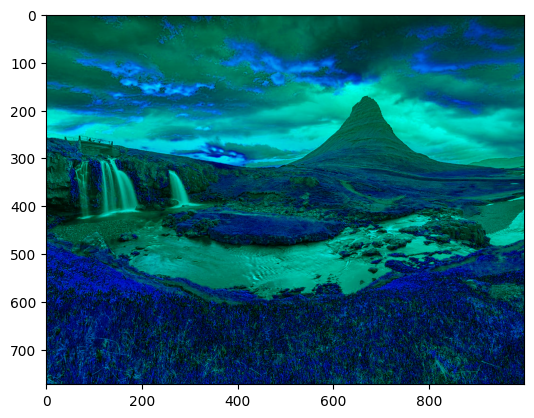

In [11]:
import cv2
import numpy as np

def imagen_canales(imagen, color):
    # Se verifica que el parámetro de color esté en entre el listado (1, 2, 3, 10, 20, o 30)
    if color not in [1, 2, 3, 10, 20, 30]:
        raise ValueError("El parámetro 'color' debe ser 1, 2, 3, 10, 20 o 30.")

    # Convertir imagen a modo RGB
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Se crea una nueva variable con las dimensiones de la imagen original donde se depositarán los nuevos pixeles
    imagen_activa_canales = np.zeros_like(imagen_rgb)

    # Se establece la selección de los canales a utilizar con base a lo requerido por el usuario
    if color == 1:  # Mostrar solo azul
        imagen_activa_canales[:, :, 0] = imagen_rgb[:, :, 2]
    elif color == 2:  # Mostrar solo verde
        imagen_activa_canales[:, :, 1] = imagen_rgb[:, :, 1]
    elif color == 3:  # Mostrar solo rojo
        imagen_activa_canales[:, :, 2] = imagen_rgb[:, :, 0]
    elif color == 10:  # Mostrar rojo y verde
        imagen_activa_canales[:, :, [1,2]] = imagen_rgb[:, :, [1,0]]
    elif color == 20:  # Mostrar verde y azul
        imagen_activa_canales[:, :, [0, 1]] = imagen_rgb[:, :, [1, 2]]
    elif color == 30:  # Mostrar azul y rojo
        imagen_activa_canales[:, :, [0, 2]] = imagen_rgb[:, :, [2, 0]]

    return imagen_activa_canales

import matplotlib.pyplot as plt
# Se importa la imagen a utilizar
imagen = cv2.imread("Iceland.jpg")

# Se seleccionan los canales a visualizar
imagen_canales= imagen_canales(imagen, 20)
plt.imshow(cv2.cvtColor(imagen_canales, cv2.COLOR_BGR2RGB))
plt.show

# Se exporta la imagen modificada
cv2.imwrite("imagen_mod.jpg", imagen_canales)


### 2.

False

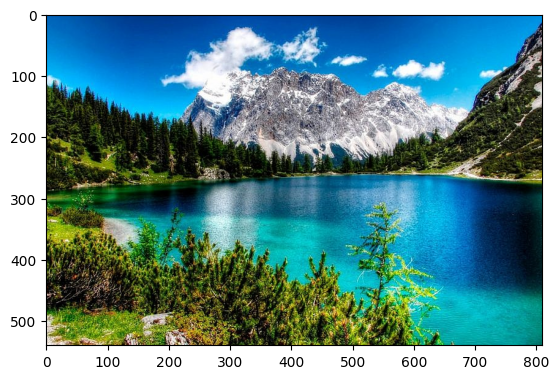

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imagen_color(img_ro, img_ve, img_az):
    
    # Asegurarse de que las imágenes de los canales tengan las mismas dimensiones
    if imagen_ro.shape != imagen_ve.shape or imagen_ro.shape != imagen_az.shape:
        raise ValueError("Las dimensiones de las imágenes deben ser las mismas.")
    
    # Se extraen las dimensiones de la imagen a procesar
    filas = imagen_ro.shape[0]
    columnas = imagen_ro.shape[1]
    
    # Se crea una nueva variable con las dimensiones de la imagen original donde se depositarán los nuevos pixeles
    imagen_color = np.zeros((filas, columnas, 3), dtype=np.uint8)

    # Se combinan los canales para asignar los colores
    imagen_color[:, :, 0] = img_az  # Canal azul
    imagen_color[:, :, 1] = img_ve  # Canal verde
    imagen_color[:, :, 2] = img_ro  # Canal rojo

    return imagen_color


# Se importan las imagenes a utilizar
imagen_ro = cv2.imread("Lab1/imagen1/imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
imagen_ve = cv2.imread("Lab1/imagen1/imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
imagen_az = cv2.imread("Lab1/imagen1/imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

# Se llama la función a utilizar
imagen_full = imagen_color(imagen_ro, imagen_ve, imagen_az)

# Se realiza el cambio de BGR a RGB
plt.imshow(cv2.cvtColor(imagen_full, cv2.COLOR_BGR2RGB))
plt.show

# Se exporta la imagen modificada
cv2.imwrite("/Lab1/imagen1/imagen_color.jpg", imagen_full)

### 3.

<function matplotlib.pyplot.show(close=None, block=None)>

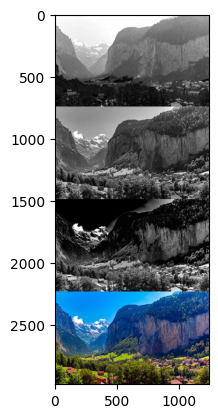

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def img_canales_g(imagen):

    # Canales de la imagen extraidos
    canales = cv2.split(imagen)

    # Canales de la imagen asignados
    az = cv2.cvtColor(canales[0], cv2.COLOR_GRAY2BGR)
    ve = cv2.cvtColor(canales[1], cv2.COLOR_GRAY2BGR)
    ro = cv2.cvtColor(canales[2], cv2.COLOR_GRAY2BGR)

    # Conversión a BGR
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Imagenes concatenadas para poder compararlas
    img_gr = np.concatenate((az,ve,ro, imagen), axis=0)

    # Exportación de imágenes
    cv2.imwrite("Lab1/imagen_ro.jpg", az)
    cv2.imwrite("Lab1/imagen_ve.jpg", ve)
    cv2.imwrite("Lab1/imagen_az.jpg", ro)
    cv2.imwrite("Lab1/img_comp.jpg", cv2.cvtColor(img_gr, cv2.COLOR_BGR2RGB))

    return ro,ve,az, img_gr

# Imagen a procesar
img_g = cv2.imread("lauterbrunnen-suiza-t.jpg")
img_rojo, img_verde, img_azul, img_comp = img_canales_g(img_g)
plt.imshow(img_comp)
plt.show


### 3.

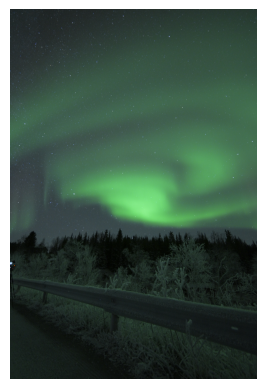

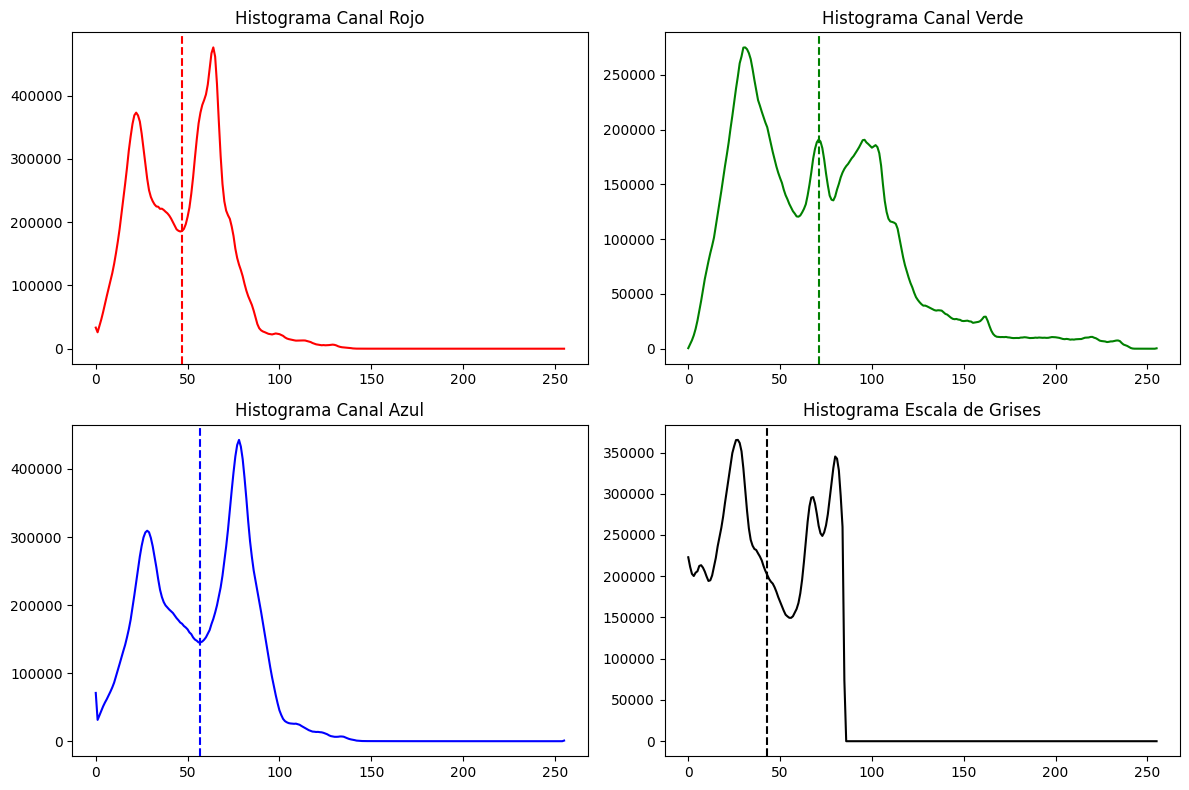

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_imagenes (imagen):
    # Conversión de imagen a escala de grises
    imagen_gris = np.mean(imagen, axis=2, dtype=np.uint8)

    # Calcula el histograma de cada canal de color y el de escala de grises
    hist_r, bordes_r = np.histogram(imagen[:, :, 2], bins=256, range=[0, 256])
    hist_v, bordes_v = np.histogram(imagen[:, :, 1], bins=256, range=[0, 256])
    hist_a, bordes_a = np.histogram(imagen[:, :, 0], bins=256, range=[0, 256])
    hist_g, bordes_g = np.histogram(imagen_gris, bins=256, range=[0, 256])

    # Calcula el valor de la media para cada canal
    media_r = np.mean(imagen[:, :, 2])
    media_v = np.mean(imagen[:, :, 1])
    media_a = np.mean(imagen[:, :, 0])
    media_g = np.mean(imagen_gris)

    # Muestra los histogramas con la línea vertical que muestra la media
    plt.figure(figsize=(12, 8))

    # Histograma Rojo
    plt.subplot(2, 2, 1)
    plt.plot(hist_r, color='red')
    plt.axvline(media_r, color='red', linestyle='dashed')
    plt.title('Histograma Canal Rojo')

    # Histograma Verde
    plt.subplot(2, 2, 2)
    plt.plot(hist_v, color='green')
    plt.axvline(media_v, color='green', linestyle='dashed')
    plt.title('Histograma Canal Verde')

    # Histrograma Azul
    plt.subplot(2, 2, 3)
    plt.plot(hist_a, color='blue')
    plt.axvline(media_a, color='blue', linestyle='dashed')
    plt.title('Histograma Canal Azul')

    # Histograma Gris
    plt.subplot(2, 2, 4)
    plt.plot(hist_g, color='black')
    plt.axvline(media_g, color='black', linestyle='dashed')
    plt.title('Histograma Escala de Grises')

    plt.tight_layout()
    plt.show()

# Cargar la imagen
imagen = cv2.imread('DSC3055.jpg')

# Mostrar la imagen a analizar
plt.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show
# Mostrar los histogramas con la línea vertical que muestra la media
histogram_imagenes(imagen)
